In [1]:
from keras.utils.np_utils import to_categorical

# We have 10 users, each is uniquely identified by an ID.
users = [i for i in range(10)]
to_categorical(users)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [2]:
import numpy as np

latent_dim = 5
inputs = to_categorical(users)
embed_mat = np.random.randn(len(users), latent_dim)

inputs.dot(embed_mat)

array([[ 0.20277279, -0.17552765, -0.63846829, -0.03211114, -0.27820262],
       [-0.96078914, -0.99735546, -3.06641184,  0.49929472,  0.19418006],
       [ 0.31298139,  0.85025593,  0.16516046, -0.97509504,  0.3903098 ],
       [ 1.1643405 , -0.00649733,  0.35586495,  0.53443866, -0.56744003],
       [ 0.13465153,  0.75378302, -0.93397956, -1.76957284, -0.6674595 ],
       [ 0.55901341,  0.15956312,  1.24745684, -0.70636032,  0.7142823 ],
       [-0.13062951,  1.34273886,  0.64721558, -0.63117172, -2.50519308],
       [-1.36246626,  0.62113579,  1.11233293, -0.24639183, -0.35321529],
       [ 0.34830782, -0.26120649,  0.31288923, -0.53283   ,  0.30290294],
       [-0.09779843, -0.471134  ,  0.30999557, -0.41630488, -0.39910924]])

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('ratings.csv', header=0, names=['user_id', 'movie_id', 'rating', 'timestamp'])

# Need to map movie ID to [1, num_movies]
movie_id_to_new_id = dict()
id = 1
for index, row in dataset.iterrows():
    if movie_id_to_new_id.get(row['movie_id']) is None:
        movie_id_to_new_id[row['movie_id']] = id
        dataset.at[index, 'movie_id'] = id
        id += 1
    else:
        dataset.at[index, 'movie_id'] = movie_id_to_new_id.get(row['movie_id'])

num_users = len(dataset.user_id.unique())
num_movies = len(dataset.movie_id.unique())
train, test = train_test_split(dataset, test_size=0.2)

print('Number of movies', num_movies)
print('Number of users', num_users)

Number of movies 9724
Number of users 610


In [6]:
train.head()

,user_id,movie_id,rating,timestamp
60008,387,1215,4.0,1094876274
19317,125,1048,4.5,1474311716
15278,99,588,5.0,829828006
31944,219,2286,3.5,1194740180
37213,249,2733,4.0,1356552078


In [7]:
test.head()

,user_id,movie_id,rating,timestamp
5115,33,994,4.0,939648134
73484,474,270,3.5,1053021069
45683,303,62,1.0,1053302847
79296,492,1,4.0,863975949
79043,489,2710,2.5,1333656766


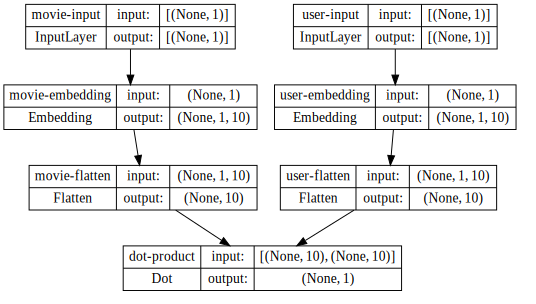

In [14]:
from keras.models import Model, Sequential
from keras.layers import Embedding, Flatten, Input, Dot
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

# Let's use a higher latent dimension.
latent_dim = 10

movie_input = Input(shape=[1],name='movie-input')
movie_embedding = Embedding(num_movies + 1, latent_dim, name='movie-embedding')(movie_input)
movie_vec = Flatten(name='movie-flatten')(movie_embedding)

user_input = Input(shape=[1],name='user-input')
user_embedding = Embedding(num_users + 1, latent_dim, name='user-embedding')(user_input)
user_vec = Flatten(name='user-flatten')(user_embedding)

prod = Dot(axes=1, name='dot-product')([movie_vec, user_vec])

model = Model([user_input, movie_input], prod)
model.compile('adam', 'mean_squared_error')

#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# Adjust DPI to reduce SVG size
dot = model_to_dot(model, show_shapes=True, dpi=70)

# Create SVG with adjusted size
svg = SVG(dot.create(prog='dot', format='svg'))

display(svg)

In [15]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 movie-input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 user-input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 movie-embedding (Embedding)    (None, 1, 10)        97250       ['movie-input[0][0]']            
                                                                                                  
 user-embedding (Embedding)     (None, 1, 10)        6110        ['user-input[0][0]']             
                                                                                            

Epoch 1/10
2521/2521 [==============================] - 6s 2ms/step - loss: 10.7916
Epoch 2/10
2521/2521 [==============================] - 5s 2ms/step - loss: 3.4722
Epoch 3/10
2521/2521 [==============================] - 5s 2ms/step - loss: 1.8636
Epoch 4/10
2521/2521 [==============================] - 5s 2ms/step - loss: 1.3224
Epoch 5/10
2521/2521 [==============================] - 5s 2ms/step - loss: 1.0704
Epoch 6/10
2521/2521 [==============================] - 5s 2ms/step - loss: 0.9334
Epoch 7/10
2521/2521 [==============================] - 5s 2ms/step - loss: 0.8495
Epoch 8/10
2521/2521 [==============================] - 5s 2ms/step - loss: 0.7925
Epoch 9/10
2521/2521 [==============================] - 5s 2ms/step - loss: 0.7526
Epoch 10/10
2521/2521 [==============================] - 5s 2ms/step - loss: 0.7207


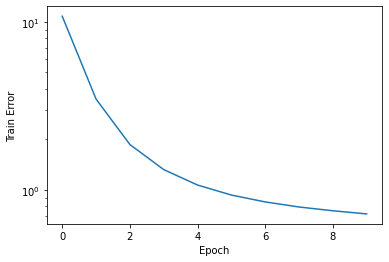

631/631 [==============================] - 1s 1ms/step


0.7803560086782358

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

history = model.fit([train.user_id, train.movie_id], train.rating, epochs=10)
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

y_hat = np.round(model.predict([test.user_id, test.movie_id]), decimals=2)
y_true = test.rating
mean_absolute_error(y_true, y_hat)

In [20]:
from keras.constraints import non_neg

latent_dim = 5

movie_input = Input(shape=[1],name='movie-input')
movie_embedding = Embedding(num_movies + 1, latent_dim, name='movie-embedding',
                                                        embeddings_constraint=non_neg())(movie_input)
movie_vec = Flatten(name='movie-flatten')(movie_embedding)

user_input = Input(shape=[1],name='user-input')
user_embedding = Embedding(num_users + 1, latent_dim, name='user-embedding',
                                                      embeddings_constraint=non_neg())(user_input)
user_vec = Flatten(name='user-flatten')(user_embedding)

prod = Dot(axes=1, name='dot-product')([movie_vec, user_vec])

model = Model([user_input, movie_input], prod)
model.compile('adam', 'mean_squared_error')

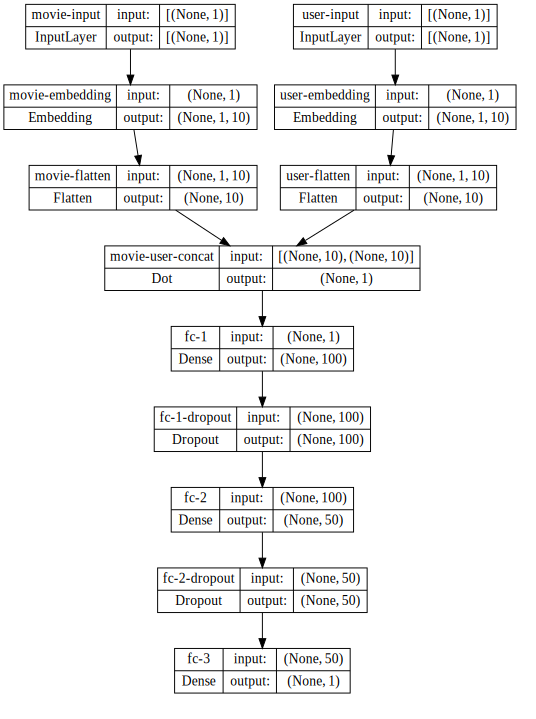

In [25]:
from keras.models import Model, Sequential
from keras.layers import Embedding, Flatten, Input, Dot, Dropout, Dense
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

latent_dim = 10

movie_input = Input(shape=[1],name='movie-input')
movie_embedding = Embedding(num_movies + 1, latent_dim, name='movie-embedding')(movie_input)
movie_vec = Flatten(name='movie-flatten')(movie_embedding)

user_input = Input(shape=[1],name='user-input')
user_embedding = Embedding(num_users + 1, latent_dim, name='user-embedding')(user_input)
user_vec = Flatten(name='user-flatten')(user_embedding)

concat = Dot(axes=1, name='movie-user-concat')([movie_vec, user_vec])
concat_dropout = Dropout(0.2)(concat)
fc_1 = Dense(100, name='fc-1', activation='relu')(concat)
fc_1_dropout = Dropout(0.2, name='fc-1-dropout')(fc_1)
fc_2 = Dense(50, name='fc-2', activation='relu')(fc_1_dropout)
fc_2_dropout = Dropout(0.2, name='fc-2-dropout')(fc_2)
fc_3 = Dense(1, name='fc-3', activation='relu')(fc_2_dropout)


model = Model([user_input, movie_input], fc_3)
model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error')

#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# Adjust DPI to reduce SVG size
dot = model_to_dot(model, show_shapes=True, dpi=70)

# Create SVG with adjusted size
svg = SVG(dot.create(prog='dot', format='svg'))

display(svg)

In [26]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 movie-input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 user-input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 movie-embedding (Embedding)    (None, 1, 10)        97250       ['movie-input[0][0]']            
                                                                                                  
 user-embedding (Embedding)     (None, 1, 10)        6110        ['user-input[0][0]']             
                                                                                            

Epoch 1/10
2521/2521 [==============================] - 7s 3ms/step - loss: 1.2181
Epoch 2/10
2521/2521 [==============================] - 7s 3ms/step - loss: 1.0915
Epoch 3/10
2521/2521 [==============================] - 7s 3ms/step - loss: 1.0917
Epoch 4/10
2521/2521 [==============================] - 6s 3ms/step - loss: 1.0931
Epoch 5/10
2521/2521 [==============================] - 7s 3ms/step - loss: 1.0934
Epoch 6/10
2521/2521 [==============================] - 7s 3ms/step - loss: 1.0929
Epoch 7/10
2521/2521 [==============================] - 7s 3ms/step - loss: 1.0923
Epoch 8/10
2521/2521 [==============================] - 7s 3ms/step - loss: 1.0921
Epoch 9/10
2521/2521 [==============================] - 7s 3ms/step - loss: 1.0938
Epoch 10/10
2521/2521 [==============================] - 7s 3ms/step - loss: 1.0929


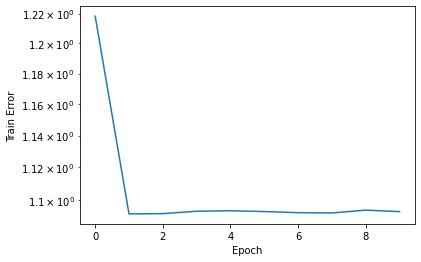

631/631 [==============================] - 1s 1ms/step


0.8421548904288813

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

history = model.fit([train.user_id, train.movie_id], train.rating, epochs=10)
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

y_hat = np.round(model.predict([test.user_id, test.movie_id]), decimals=2)
y_true = test.rating
mean_absolute_error(y_true, y_hat)

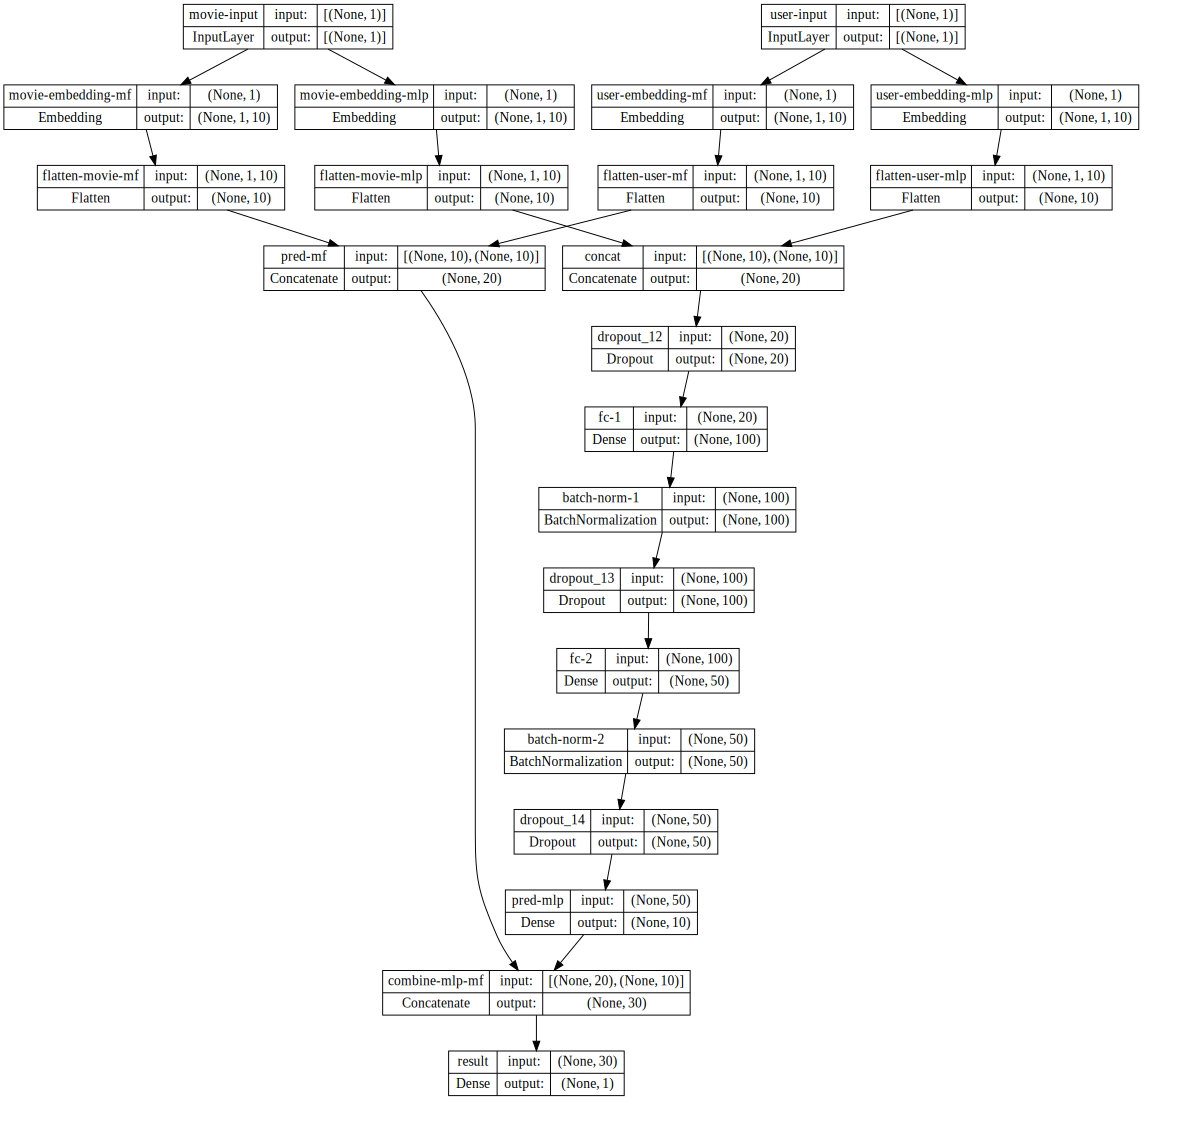

In [32]:
from keras.models import Model, Sequential
from keras.layers import Embedding, Flatten, Input, concatenate, Dropout, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

latent_dim = 10

# Define inputs
movie_input = Input(shape=[1],name='movie-input')
user_input = Input(shape=[1], name='user-input')

# MLP Embeddings
movie_embedding_mlp = Embedding(num_movies + 1, latent_dim, name='movie-embedding-mlp')(movie_input)
movie_vec_mlp = Flatten(name='flatten-movie-mlp')(movie_embedding_mlp)

user_embedding_mlp = Embedding(num_users + 1, latent_dim, name='user-embedding-mlp')(user_input)
user_vec_mlp = Flatten(name='flatten-user-mlp')(user_embedding_mlp)

# MF Embeddings
movie_embedding_mf = Embedding(num_movies + 1, latent_dim, name='movie-embedding-mf')(movie_input)
movie_vec_mf = Flatten(name='flatten-movie-mf')(movie_embedding_mf)

user_embedding_mf = Embedding(num_users + 1, latent_dim, name='user-embedding-mf')(user_input)
user_vec_mf = Flatten(name='flatten-user-mf')(user_embedding_mf)

# MLP layers
concat = concatenate([movie_vec_mlp, user_vec_mlp], name='concat')
concat_dropout = Dropout(0.2)(concat)
fc_1 = Dense(100, name='fc-1', activation='relu')(concat_dropout)
fc_1_bn = BatchNormalization(name='batch-norm-1')(fc_1)
fc_1_dropout = Dropout(0.2)(fc_1_bn)
fc_2 = Dense(50, name='fc-2', activation='relu')(fc_1_dropout)
fc_2_bn = BatchNormalization(name='batch-norm-2')(fc_2)
fc_2_dropout = Dropout(0.2)(fc_2_bn)

# Prediction from both layers
pred_mlp = Dense(10, name='pred-mlp', activation='relu')(fc_2_dropout)
pred_mf = concatenate([movie_vec_mf, user_vec_mf], name='pred-mf')
combine_mlp_mf = concatenate([pred_mf, pred_mlp], name='combine-mlp-mf')

# Final prediction
result = Dense(1, name='result', activation='relu')(combine_mlp_mf)

model = Model([user_input, movie_input], result)
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_absolute_error')

#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# Adjust DPI to reduce SVG size
dot = model_to_dot(model, show_shapes=True, dpi=70)

# Create SVG with adjusted size
svg = SVG(dot.create(prog='dot', format='svg'))

display(svg)

In [33]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 movie-input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 user-input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 movie-embedding-mlp (Embedding  (None, 1, 10)       97250       ['movie-input[0][0]']            
 )                                                                                                
                                                                                                  
 user-embedding-mlp (Embedding)  (None, 1, 10)       6110        ['user-input[0][0]']       

Epoch 1/10
2521/2521 [==============================] - 11s 3ms/step - loss: 0.7377
Epoch 2/10
2521/2521 [==============================] - 8s 3ms/step - loss: 0.6566
Epoch 3/10
2521/2521 [==============================] - 9s 3ms/step - loss: 0.6420
Epoch 4/10
2521/2521 [==============================] - 9s 3ms/step - loss: 0.6339
Epoch 5/10
2521/2521 [==============================] - 9s 3ms/step - loss: 0.6261
Epoch 6/10
2521/2521 [==============================] - 9s 3ms/step - loss: 0.6203
Epoch 7/10
2521/2521 [==============================] - 8s 3ms/step - loss: 0.6173
Epoch 8/10
2521/2521 [==============================] - 9s 4ms/step - loss: 0.6136
Epoch 9/10
2521/2521 [==============================] - 8s 3ms/step - loss: 0.6129
Epoch 10/10
2521/2521 [==============================] - 9s 3ms/step - loss: 0.6107


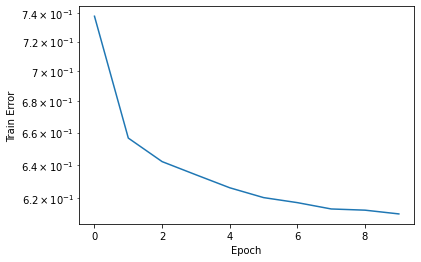

631/631 [==============================] - 1s 1ms/step


0.6700322304522409

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

history = model.fit([train.user_id, train.movie_id], train.rating, epochs=10)
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

y_hat = np.round(model.predict([test.user_id, test.movie_id]), decimals=2)
y_true = test.rating
mean_absolute_error(y_true, y_hat)